In [66]:
#Importing necessery Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [67]:
advertising = pd.read_csv(r"C:\Users\spark tech\Desktop\advertising.csv")

In [68]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


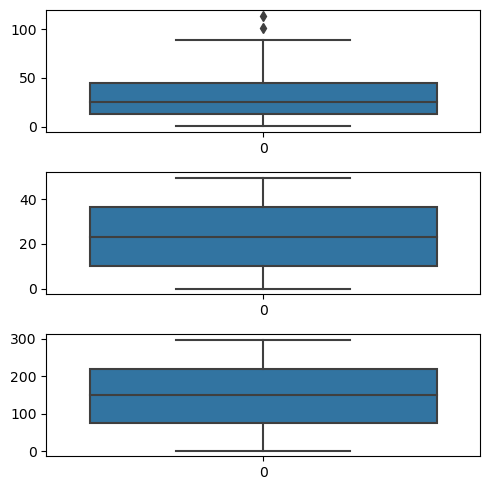

In [69]:
# Outlier Analysis
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3,figsize = (5,5))
plt1 = sns.boxplot(advertising["Newspaper"], ax = axs[0])
plt2 = sns.boxplot(advertising["Radio"], ax = axs[1])
plt2 = sns.boxplot(advertising["TV"], ax = axs[2])
plt.tight_layout()


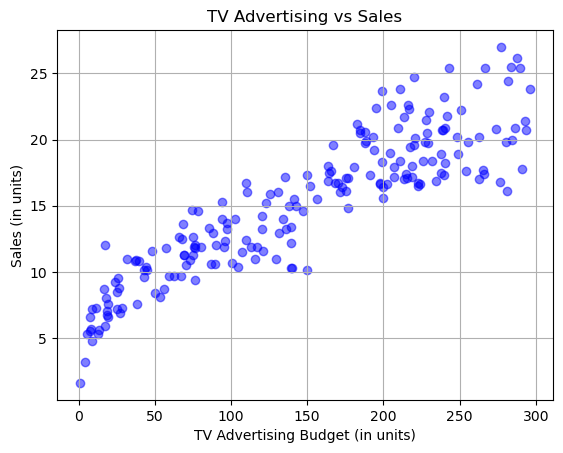

In [13]:
# As we see that there are no outliers in given data using box plot but let me check using scater plot for outliers
TV =advertising["TV"]
Sales =advertising["Sales"]
plt.scatter(TV, Sales,color='blue', alpha=0.5)
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising Budget (in units)')
plt.ylabel('Sales (in units)')
plt.grid(True)
plt.show()

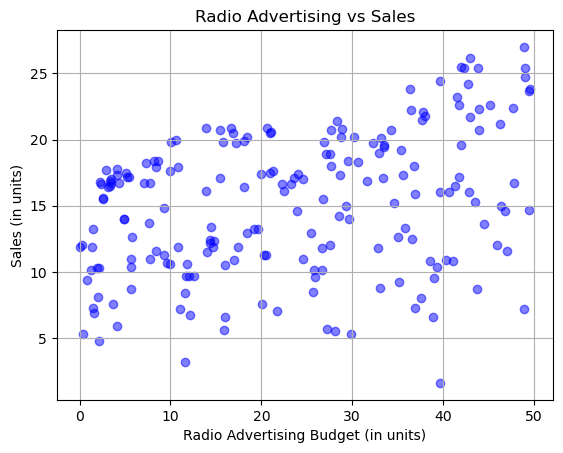

In [18]:
Radio = advertising["Radio"]
Sales = advertising["Sales"]
plt.scatter(Radio, Sales,color='blue', alpha=0.5)
plt.title('Radio Advertising vs Sales')
plt.xlabel('Radio Advertising Budget (in units)')
plt.ylabel('Sales (in units)')
plt.grid(True)
plt.show()

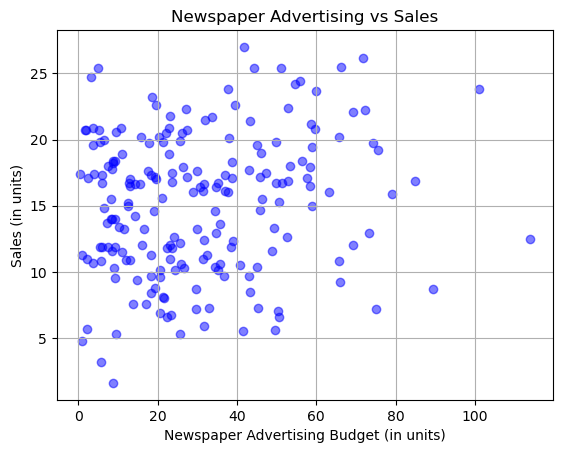

In [19]:
Newspaper = advertising["Newspaper"]
Sales = advertising["Sales"]
plt.scatter(Newspaper, Sales,color='blue', alpha=0.5)
plt.title('Newspaper Advertising vs Sales')
plt.xlabel('Newspaper Advertising Budget (in units)')
plt.ylabel('Sales (in units)')
plt.grid(True)
plt.show()

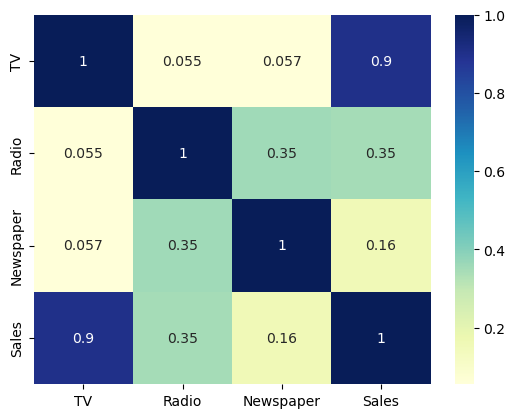

In [20]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### As we can see that TV is very corellated with sales so let perform simple linear regression using TV as our feature variable.


# As In our case the equation becomes 

# Y = MX + C
# where M =paramter , X = TV and C is constant

#### what actually we are  doing is we are going to make a model which is train on the test data, for the prediction of sales in future

In [70]:
advertising = advertising[["TV","Sales"]]

In [71]:
advertising

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


#### As We only need TV and sale because they are correlated to eash other very high thats why we droped all other values

In [83]:
X = advertising["TV"]
y = advertising["Sales"]
# Our Equation is Y = MX + C

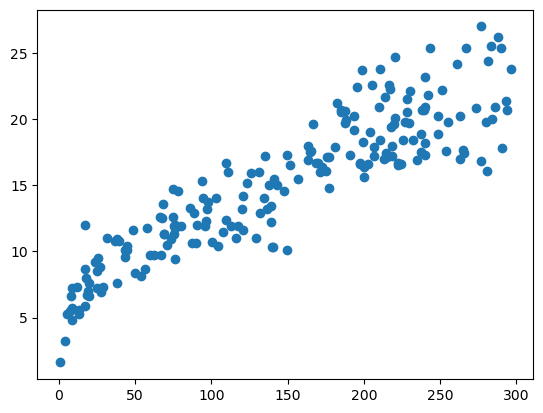

In [73]:
plt.scatter(X,y)
plt.show()

## A positive correlation is seen here between TV and Sales

## Before going to ML we usaually split the data into Training data  and test data for that we use the following function

In [74]:
# so that we can train the model using training data and test the model using test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7,test_size= 0.3,random_state= 100)

#train_size = 0.7 means that it will split 70% of the data for the train purpose and remaning 30 % for test 

In [75]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [36]:
# As it is the random 70% of the dara which is split into X_train data and remainin 30% is Saved In X_test data 
X_test
# after training our model we will use that test data to check our model for prediction purpose

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
167    206.8
116    139.2
96     197.6
52     216.4
69     216.8
164    117.2
124    229.5
182     56.2
154    187.8
125     87.2
196     94.2
194    149.7
177    170.2
163    163.5
31     112.9
11     214.7
73     129.4
15     195.4
41     177.0
97     184.9
128    220.3
133    219.8
82      75.3
139    184.9
123    123.1
83      68.4
65      69.0
151    121.0
162    188.4
170     50.0
77     120.5
32      97.2
173    168.4
174    222.4
85     193.2
168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
46      89.7
75      16.9
28     248.8
29      70.6
195     38.2
40     202.5
153    171.3
115     75.1
64     131.1
59     210.7
1       44.5
192     17.2
136     25.6
152    197.6
161     85.7
Name: TV, dtype: float64

In [76]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

### here 74,3,185 are the random coloumn numbers 

In [77]:
y_train.head()
#Corrsponding sales values for X_train data of TV

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [78]:
X_train.shape, y_train.shape

((140,), (140,))

## it means that it is 1D data which contains 140 data each in TV and Sale for Train the model purpose

### As in linear Regression model # X_train is a 2D array-like object with dimensions (n_samples, n_features)
#### y_train is a 1D array-like object with length n_samples

### let me chage X_train and X_teat into two D Array 

In [79]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

## Model Selection

In [85]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

In [86]:
## now we need to fit the our X_train and y_train data to the model
Lr.fit(X_train,y_train)

LinearRegression()

## Our model is train mow , its means that the model find the vakue of m and C in the equation.
### Y = MX + C, so we can now predict

In [91]:
c= Lr.intercept_
c
## As C is Intercept

6.948683200001357

In [93]:
m= Lr.coef_
m
# As M is called Coefficient or slop

array([0.05454575])

In [94]:
y_prid_train  = Lr.predict(X_train)
y_prid_train

array([18.58874687, 15.21236477, 18.13056255, 14.74327129, 14.27417782,
       11.32325258, 20.02875475, 11.76507318,  8.00687081, 19.26511421,
       14.37781475,  8.3177816 ,  9.02142181, 16.35782558, 12.93780687,
       20.04511848, 19.60875245, 10.55415747, 18.86147564, 19.73966226,
        8.24687212, 10.64688525, 23.11604436, 14.65599809, 16.49964454,
       18.97602172, 11.11597872, 20.79239529, 17.37237658, 22.63604174,
       12.42507679, 19.38511486, 13.80508434, 11.02325094, 10.08506399,
       21.27785249, 21.28876164, 19.89784494, 19.34147826, 17.84692463,
       19.40147859, 22.80513357, 22.05240218, 17.84692463, 20.00148187,
       10.95234146, 22.45604075, 14.9832726 , 19.16693185, 17.79783345,
       22.04149303,  7.66868714,  7.58686851, 22.23240317,  9.10324044,
       21.43603517,  8.44869141, 22.25967604, 11.21416108, 15.85600465,
       18.59420145, 22.96331626,  7.96868878, 11.06688755, 16.04691479,
        9.38687836, 12.93780687,  7.42323125, 21.50694465, 18.23

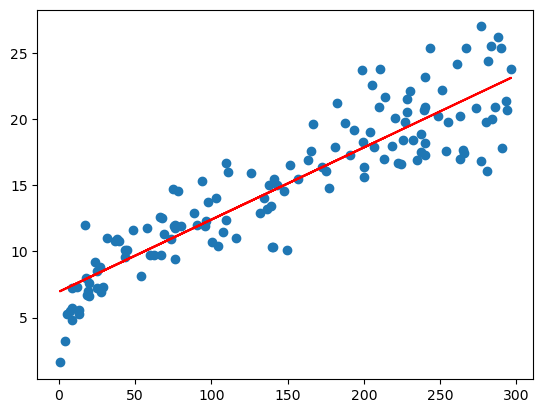

In [97]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_prid_train, color = "red")
plt.show()

## Now lets  predict For test Data 

In [98]:
y_prid_test  = Lr.predict(X_test)
y_prid_test

array([ 7.37414007, 19.94148154, 14.32326899, 18.82329361, 20.13239168,
       18.2287449 , 14.54145201, 17.72692398, 18.75238413, 18.77420243,
       13.34144544, 19.46693349, 10.01415451, 17.1923756 , 11.70507285,
       12.08689312, 15.11418241, 16.23237035, 15.8669138 , 13.1068987 ,
       18.65965635, 14.00690363, 17.60692332, 16.60328147, 17.03419291,
       18.96511257, 18.93783969, 11.05597839, 17.03419291, 13.66326538,
       10.6796127 , 10.71234015, 13.5487193 , 17.22510305,  9.67597085,
       13.52144643, 12.25053038, 16.13418799, 19.07965865, 17.48692266,
       18.69783838, 16.53237199, 15.92145955, 18.86693021, 13.5050827 ,
       11.84143724,  7.87050642, 20.51966653, 10.79961336,  9.03233096,
       17.99419817, 16.29237067, 11.04506924, 14.09963141, 18.44147334,
        9.3759692 ,  7.88687015,  8.34505447, 17.72692398, 11.62325422])

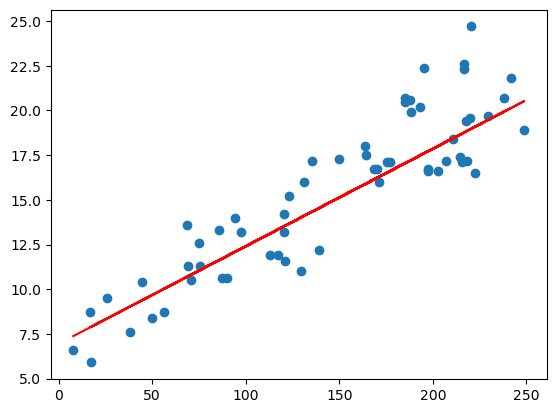

In [99]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_prid_test, color = "red")
plt.show()